In [7]:
#Udai Nagpal, Jin Woo Won
# -----------Part 5(iv)------------
import numpy as np
import math
from numpy import linalg as LA

def sigmoid(x):
    '''Element by element sigmoid of column vector'''
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_deriv(x):
    '''Element by element sigmoid derivative of column vector'''
    return sigmoid(x) * (1 - sigmoid(x))

y = np.array([[1],[2],[-1],[-3]])
print(sigmoid(y))
print(sigmoid_deriv(y))

[[ 0.73105858]
 [ 0.88079708]
 [ 0.26894142]
 [ 0.04742587]]
[[ 0.19661193]
 [ 0.10499359]
 [ 0.19661193]
 [ 0.04517666]]


In [2]:
def stochastic_gradient_descent (input_data, output_data, inter_layer_sizes, convergence_cutoff=0.00001, max_iterations=50, minibatch_size=25, learning_rate=0.2):
    layer_sizes = [len(input_data[0])] + inter_layer_sizes + [len(output_data[0])]
    num_layers = len(layer_sizes)
    #Random Initialization
    W = [np.random.uniform(low=-2.0, high=2.0, size=(layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    dW = [[np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)] for j in range(minibatch_size)]
    b = [np.random.uniform(low=-2.0, high=2.0, size=(layer_sizes[i+1],)) for i in range(num_layers-1)]
    db = [[np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)] for j in range(minibatch_size)]
    abs_adjustments_W = [100*np.ones((layer_sizes[i],layer_sizes[i+1])) for i in range(num_layers-1)]
    abs_adjustments_b = [100*np.ones((layer_sizes[i+1],)) for i in range(len(layer_sizes)-1)]
    #print('W:' + str(W))
    #print('b:' + str(b))
    elapsed_iterations = 0
    max_adjustment_W, max_adjustment_b = 100, 100
    while(elapsed_iterations<max_iterations and max_adjustment_W>=convergence_cutoff and max_adjustment_b>=convergence_cutoff):
        stochastic_sample = np.random.choice(a=len(output_data),size=minibatch_size, replace=False)
        sample_inputs = [input_data[i] for i in stochastic_sample]
        sample_outputs = [output_data[i] for i in stochastic_sample]
        dW_sum = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
        db_sum = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
        sample_predictions = []
        running_cost = 0
        for sample in range(len(sample_outputs)):
            x = sample_inputs[sample]
            y = sample_outputs[sample]
            #print('sample input: ' + str(x))
            #print('sample output: ' + str(y))
            saved_forward_pass = [x]
            layer_input = x
            #Forward Pass
            for layer in range(num_layers-1):
                layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
                out_dim = layer_output.shape[0]
                layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
                layer_input = np.hstack(layer_input)
                saved_forward_pass.append(layer_input)
            sample_prediction = np.array(saved_forward_pass[-1:])
            running_cost += LA.norm(np.subtract(sample_prediction, np.array(y)))**2.0
            #BACKPROPAGATION
            deltas = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
            for output_component in range(len(deltas[num_layers-2])):
                deltas[num_layers-2][output_component] = -1.0 * (y[output_component]-saved_forward_pass[-1][output_component])*saved_forward_pass[-1][output_component]*(1-saved_forward_pass[-1][output_component])
            #Backpropagating Deltas
            for layer in range(num_layers-3, -1, -1):
                for neuron_ind in range(len(saved_forward_pass[layer+1])):
                    sigmoid_val = saved_forward_pass[layer+1][neuron_ind]
                    partial_sigmoid = (sigmoid_val) * (1 - sigmoid_val)
                    corr_weights = np.array(W[layer+1][neuron_ind,:])
                    corr_deltas = np.array(deltas[layer+1])
                    deltas[layer][neuron_ind] = partial_sigmoid * np.dot(corr_weights, corr_deltas)
            #Computing gradient of cost function w.r.t. W and b
            for layer in range(num_layers-1):
                for j in range(len(saved_forward_pass[layer+1])):
                    for i in range(len(saved_forward_pass[layer])):
                        dW[sample][layer][i,j] = deltas[layer][j] * saved_forward_pass[layer][i]
                    db[sample][layer][j] = deltas[layer][j]
            for i in range(len(dW_sum)):
                dW_sum[i] = np.add(dW_sum[i], dW[sample][i])
            #print(dW[sample])
            #dW_sum = np.add(dW_sum, dW[sample])
            db_sum = np.add(db_sum,db[sample])
            #print('deltas: ' + str(deltas))
            #print('dW: ' + str(dW))
            #print('db: ' + str(db))
        print("Cost Function: " + str(running_cost/(2.0*minibatch_size)))
        #print('dW sum: ' + str(dW_sum))
        db_avg = db_sum / minibatch_size
        dW_avg = [dWi/minibatch_size for dWi in dW_sum]
        #Updating Weight Parameters and Checking for Convergence
        max_adjustment_W = 0
        max_adjustment_b = 0
        for layer in range(num_layers-1):
            W[layer] = W[layer] - learning_rate * dW_avg[layer]
            b[layer] = b[layer] - learning_rate * db_avg[layer]
            adj_W = np.absolute(learning_rate * dW_avg[layer])
            adj_b = np.absolute(learning_rate * db_avg[layer])
            if (np.amax(adj_W) > max_adjustment_W):
                max_adjustment_W = np.amax(adj_W)
            if (np.amax(adj_b) > max_adjustment_b):
                max_adjustment_b = np.amax(adj_b)
        #print('Updated W: ' + str(W))
        #print('Updated b: ' + str(b))
        elapsed_iterations += 1
        #print(elapsed_iterations)
    #Final Output Predictions from Trained Model  
    final_pred_outputs = []
    for input_point in input_data:
        forward_pass = [input_point]
        layer_input = input_point
        for layer in range(num_layers-1):
            layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
            #print(layer_output)
            out_dim = layer_output.shape[0]
            layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
            layer_input = np.hstack(layer_input)
            forward_pass.append(layer_input)
        #print(forward_pass)
        final_pred_outputs.append(forward_pass[-1:])
    final_pred_outputs = [output.tolist() for out_list in final_pred_outputs for output in out_list]
    print("Final W: " + str(W))
    print("Final b: " + str(b))
    #print("Actual Outputs: " + str(output_data))
    #print("Predicted Outputs: " + str(final_pred_outputs))
    print("Total Elapsed Iterations: " + str(elapsed_iterations))

In [4]:
#TEST OF STOCHASTIC GRADIENT DESCENT: COST FUNCTION IS INDEED MINIMIZED
my_input = [i.tolist() for i in np.random.uniform(size=(100,2))]
#print(my_input)
my_output = []
for j in range(len(my_input)):
    my_output.append([sigmoid_scalar(1*my_input[j][0] +2*my_input[j][1] - 1), sigmoid_scalar(1.2*my_input[j][0] +1.7*my_input[j][1] - 1.3)])
my_output = np.array(my_output)
#print(my_output)
stochastic_gradient_descent(my_input, my_output, [2,2])

NameError: name 'stochastic_gradient_descent' is not defined

In [57]:
def adam (input_data, output_data, inter_layer_sizes, convergence_cutoff=0.000001, 
          max_iterations=3000, minibatch_size=100, learning_rate=0.0015, weight_decay_time=100):
    
    # initialize variables
    beta_1 = 0.9
    beta_2 = 0.999
    epsilon = 10**(-8.0)
    layer_sizes = [len(input_data[0])] + inter_layer_sizes + [len(output_data[0])]
    num_layers = len(layer_sizes)
    
    #Random Initialization
    W = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    dW = [[np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)] for j in range(minibatch_size)]
    b = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i+1],)) for i in range(num_layers-1)]
    db = [[np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)] for j in range(minibatch_size)]
    m = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    v = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    m_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    v_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    abs_adjustments_W = [100*np.ones((layer_sizes[i],layer_sizes[i+1])) for i in range(num_layers-1)]
    abs_adjustments_b = [100*np.ones((layer_sizes[i+1],)) for i in range(len(layer_sizes)-1)]
    #print('W:' + str(W))
    #print('b:' + str(b))
    elapsed_iterations = 0
    weight_decay = 1
    max_adjustment_W, max_adjustment_b = 100, 100
    
    # NN
    while(elapsed_iterations<max_iterations and max_adjustment_W>=convergence_cutoff and max_adjustment_b>=convergence_cutoff):
        
        # sample data
        stochastic_sample = np.random.choice(a=len(output_data),size=minibatch_size, replace=False)
        sample_inputs = [input_data[i] for i in stochastic_sample]
        sample_outputs = [output_data[i] for i in stochastic_sample]
        dW_sum = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
        db_sum = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
        sample_predictions = []
        running_cost = 0
        for sample in range(len(sample_outputs)):
            x = sample_inputs[sample]
            y = sample_outputs[sample]
            #print('sample input: ' + str(x))
            #print('sample output: ' + str(y))
            saved_forward_pass = [x]
            layer_input = x
            
            #Forward Pass
            for layer in range(num_layers-1):
                layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
                out_dim = layer_output.shape[0]
                layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
                layer_input = np.hstack(layer_input)
                saved_forward_pass.append(layer_input)
            sample_prediction = np.array(saved_forward_pass[-1:])
            running_cost += LA.norm(np.subtract(sample_prediction, np.array(y)))**2.0
            
            #BACKPROPAGATION
            deltas = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
            for output_component in range(len(deltas[num_layers-2])):
                deltas[num_layers-2][output_component] = -1.0 * (y[output_component]-saved_forward_pass[-1][output_component])*saved_forward_pass[-1][output_component]*(1-saved_forward_pass[-1][output_component])
            
            #Backpropagating Deltas
            for layer in range(num_layers-3, -1, -1):
                for neuron_ind in range(len(saved_forward_pass[layer+1])):
                    sigmoid_val = saved_forward_pass[layer+1][neuron_ind]
                    partial_sigmoid = (sigmoid_val) * (1 - sigmoid_val)
                    corr_weights = np.array(W[layer+1][neuron_ind,:])
                    corr_deltas = np.array(deltas[layer+1])
                    deltas[layer][neuron_ind] = partial_sigmoid * np.dot(corr_weights, corr_deltas)
            #Computing gradient of cost function w.r.t. W and b
            for layer in range(num_layers-1):
                for j in range(len(saved_forward_pass[layer+1])):
                    for i in range(len(saved_forward_pass[layer])):
                        dW[sample][layer][i,j] = deltas[layer][j] * saved_forward_pass[layer][i]
            db[sample] = deltas
            dW_sum = np.add(dW_sum, dW[sample])
            db_sum = np.add(db_sum,db[sample])
            #print('deltas: ' + str(deltas))
            #print('dW: ' + str(dW))
            #print('db: ' + str(db))
        print("Cost Function: " + str(running_cost/(2.0*minibatch_size)))
        #print('dW sum: ' + str(dW_sum))
        db_avg = np.divide(db_sum,minibatch_size)
        dW_avg = np.divide(dW_sum, minibatch_size)
        #Updating Weight Parameters and Checking for Convergence
        max_adjustment_W = 0
        max_adjustment_b = 0
        weight_decay = weight_decay * (2**(-1.0/weight_decay_time))
        print(weight_decay)
        m = np.add(np.multiply(beta_1, m),np.multiply((1-beta_1), dW_avg))
        v = np.add(np.multiply(beta_2, v),np.multiply((1-beta_2), np.square(dW_avg)))
        W = np.subtract(W, np.multiply(learning_rate*weight_decay, np.divide(m, np.add(np.sqrt(v), epsilon))))
        m_b = np.add(np.multiply(beta_1, m_b),np.multiply(1-beta_1,db_avg))
        v_b = np.add(np.multiply(beta_2, v_b),np.multiply(1-beta_2, np.square(db_avg)))
        b = np.subtract(b, np.multiply(learning_rate*weight_decay,np.divide(m_b, np.add(np.sqrt(v_b), epsilon))))
        for layer in range(num_layers-1):
            adj_W = np.absolute(learning_rate * np.divide(m[layer], np.add(np.sqrt(v[layer]), epsilon)))
            adj_b = np.absolute(learning_rate * np.divide(m_b[layer], np.add(np.sqrt(v_b[layer]), epsilon)))
            if (np.amax(adj_W) > max_adjustment_W):
                max_adjustment_W = np.amax(adj_W)
            if (np.amax(adj_b) > max_adjustment_b):
                max_adjustment_b = np.amax(adj_b)
        #print('Updated W: ' + str(W))
        #print('Updated b: ' + str(b))
        elapsed_iterations += 1
        #print(elapsed_iterations)
    #Final Output Predictions from Trained Model  
    final_pred_outputs = []
    for input_point in input_data:
        forward_pass = [input_point]
        layer_input = input_point
        for layer in range(num_layers-1):
            layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
            #print(layer_output)
            out_dim = layer_output.shape[0]
            layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
            layer_input = np.hstack(layer_input)
            forward_pass.append(layer_input)
        #print(forward_pass)
        final_pred_outputs.append(forward_pass[-1:])
    final_pred_outputs = [output.tolist() for out_list in final_pred_outputs for output in out_list]
    #print("Final W: " + str(W))
    #print("Final b: " + str(b))
    #print("Actual Outputs: " + str(output_data))
    #print("Predicted Outputs: " + str(final_pred_outputs))
    print("Total Elapsed Iterations: " + str(elapsed_iterations))
    return final_pred_outputs

#Testing adam
test_adam_results = adam(input_data=my_input, output_data = my_output, inter_layer_sizes=[2,2],max_iterations=50, minibatch_size=15)

Cost Function: 0.08238290531979282
0.9930924954370359
Cost Function: 0.08719721379460021
0.9862327044933592
Cost Function: 0.08628033444213684
0.979420297586927
Cost Function: 0.08086467622484593
0.9726549474122856
Cost Function: 0.07760467988086334
0.9659363289248457
Cost Function: 0.07260360290877362
0.9592641193252646
Cost Function: 0.08019601014845082
0.9526379980439376
Cost Function: 0.07072080685179154
0.9460576467255961
Cost Function: 0.06798417838059442
0.939522749214012
Cost Function: 0.06185436251736662
0.9330329915368076
Cost Function: 0.06249335832344037
0.9265880618903711
Cost Function: 0.06884083378761773
0.9201876506248754
Cost Function: 0.060295553448712604
0.9138314502294009
Cost Function: 0.07124889772245405
0.9075191553171613
Cost Function: 0.050367893259001
0.9012504626108307
Cost Function: 0.05480212391311232
0.8950250709279729
Cost Function: 0.04749647200693041
0.8888426811665707
Cost Function: 0.05247629808656482
0.8827029962906554
Cost Function: 0.05471181323913

In [8]:
def adam_itr (input_data, output_data, inter_layer_sizes, max_iterations=3000, 
              minibatch_size=100, learning_rate=0.003, weight_decay_time=8000):
    
    # initialize adam variables
    beta_1 = 0.9
    beta_2 = 0.999
    epsilon = 10**(-8.0)
    decay_factor = 1    #Fixed learning rate
    #decay_factor = 2**(-1.0/weight_decay_time)
    layer_sizes = [len(input_data[0])] + inter_layer_sizes + [len(output_data[0])]
    num_layers = len(layer_sizes)
    
    #Random Initialization
    W = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i],layer_sizes[i+1])) 
         for i in range(len(layer_sizes)-1)]
    
    ''''''
    dW = [[np.zeros((layer_sizes[i],layer_sizes[i+1])) 
           for i in range(len(layer_sizes)-1)] for j in range(minibatch_size)]
    b = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i+1],)) 
         for i in range(num_layers-1)]
    
    ''''''
    db = [[np.zeros((layer_sizes[i+1],)) 
           for i in range(num_layers-1)] for j in range(minibatch_size)]
    m = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    v = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    m_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    v_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    abs_adjustments_W = [100*np.ones((layer_sizes[i],layer_sizes[i+1])) for i in range(num_layers-1)]
    abs_adjustments_b = [100*np.ones((layer_sizes[i+1],)) for i in range(num_layers-1)]

    # initialize NN variables
    elapsed_iterations = 0
    weight_decay = 1
    max_adjustment_W, max_adjustment_b = 100, 100
    while(elapsed_iterations<max_iterations):
        
        # take a random sample of minibatch 
        inputs = input_data[np.random.choice(input_data.shape[0], minibatch_size, replace=False), :]
        outputs = input_data[np.random.choice(output_data.shape[0], minibatch_size, replace=False), :]
        
        ''''''
        dW_sum = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
        db_sum = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
        sample_predictions = []
        running_cost = 0
        
        """
        sample_input -> inputs
        sample_output -> outputs
        sample_prediction -> predictions
        saved_forward_pass -> sigmoided_neuron_outputs
        """
        
        # forward pass all the samples
        layer_inputs = inputs # a n*2 matrix of input Xs
        sigmoided_neuron_outputs = [sample] # a 
        for layer in range(len(sample_outputs)):
            layer_outputs = w[layer].T @ layer_inputs + b[layer] # a matrix n*d matrix
            layer_inputs = sigmoid(layer_outputs)
            sigmoided_neuron_outputs.append(layer_inputs)
        predictions = sigmoided_neuron_outputs[-1]
        running_cost += LA.norm(predictions - outputs)**2.0
        
        # backpropagation
            
     
    """Udai's code"""
            
        
        for sample in range(len(sample_outputs)):
            x = sample_inputs[sample]
            y = sample_outputs[sample]
            #print('sample input: ' + str(x))
            #print('sample output: ' + str(y))
            saved_forward_pass = [x]
            layer_input = x
            #Forward Pass
            for layer in range(num_layers-1):
                layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
                out_dim = layer_output.shape[0]
                layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
                layer_input = np.hstack(layer_input)
                saved_forward_pass.append(layer_input)
            sample_prediction = np.array(saved_forward_pass[-1:])
            running_cost += LA.norm(np.subtract(sample_prediction, np.array(y)))**2.0
            #BACKPROPAGATION
            deltas = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
            for output_component in range(len(deltas[num_layers-2])):
                deltas[num_layers-2][output_component] = -1.0 * (y[output_component]-saved_forward_pass[-1][output_component])*saved_forward_pass[-1][output_component]*(1-saved_forward_pass[-1][output_component])
            #Backpropagating Deltas
            for layer in range(num_layers-3, -1, -1):
                for neuron_ind in range(len(saved_forward_pass[layer+1])):
                    sigmoid_val = saved_forward_pass[layer+1][neuron_ind]
                    partial_sigmoid = (sigmoid_val) * (1 - sigmoid_val)
                    corr_weights = np.array(W[layer+1][neuron_ind,:])
                    corr_deltas = np.array(deltas[layer+1])
                    deltas[layer][neuron_ind] = partial_sigmoid * np.dot(corr_weights, corr_deltas)
            #Computing gradient of cost function w.r.t. W and b
            for layer in range(num_layers-1):
                for j in range(len(saved_forward_pass[layer+1])):
                    for i in range(len(saved_forward_pass[layer])):
                        dW[sample][layer][i,j] = deltas[layer][j] * saved_forward_pass[layer][i]
            db[sample] = deltas
            dW_sum = np.add(dW_sum, dW[sample])
            db_sum = np.add(db_sum,db[sample])
            #print('deltas: ' + str(deltas))
            #print('dW: ' + str(dW))
            #print('db: ' + str(db))
        print("Cost Function: " + str(running_cost/(2.0*minibatch_size)) + ', Iteration: ' + str(elapsed_iterations))
        #print('dW sum: ' + str(dW_sum))
        db_avg = np.divide(db_sum,minibatch_size)
        dW_avg = np.divide(dW_sum, minibatch_size)
        #Updating Weight Parameters
        max_adjustment_W = 0
        max_adjustment_b = 0
        weight_decay = weight_decay * decay_factor
        m = np.add(np.multiply(beta_1, m),np.multiply((1-beta_1), dW_avg))
        v = np.add(np.multiply(beta_2, v),np.multiply((1-beta_2), np.square(dW_avg)))
        sqrt_v = [np.sqrt(v_i) for v_i in v]
        W = np.subtract(W, np.multiply(learning_rate*weight_decay, np.divide(m, np.add(sqrt_v, epsilon))))
        m_b = np.add(np.multiply(beta_1, m_b),np.multiply(1-beta_1,db_avg))
        v_b = np.add(np.multiply(beta_2, v_b),np.multiply(1-beta_2, np.square(db_avg)))
        sqrt_v_b = [np.sqrt(v_bi) for v_bi in v_b]
        b = np.subtract(b, np.multiply(learning_rate*weight_decay,np.divide(m_b, np.add(sqrt_v_b, epsilon))))
        elapsed_iterations += 1
        #print(elapsed_iterations)
    #Final Output Predictions from Trained Model  
    final_pred_outputs = []
    for input_point in input_data:
        forward_pass = [input_point]
        layer_input = input_point
        for layer in range(num_layers-1):
            layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
            #print(layer_output)
            out_dim = layer_output.shape[0]
            layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
            layer_input = np.hstack(layer_input)
            forward_pass.append(layer_input)
        #print(forward_pass)
        final_pred_outputs.append(forward_pass[-1:])
    final_pred_outputs = [output.tolist() for out_list in final_pred_outputs for output in out_list]
    #print("Final W: " + str(W))
    #print("Final b: " + str(b))
    #print("Actual Outputs: " + str(output_data))
    #print("Predicted Outputs: " + str(final_pred_outputs))
    print("Total Elapsed Iterations: " + str(elapsed_iterations))
    return final_pred_outputs

#Testing adam
test_adam_results = adam(input_data=my_input, output_data = my_output, inter_layer_sizes=[2,2],max_iterations=50, minibatch_size=15)

IndentationError: unexpected indent (<ipython-input-8-44831187ce62>, line 72)

In [101]:
def adam_vectorized(input_data, output_data, inter_layer_sizes, max_iterations=3000, 
              minibatch_size=100, learning_rate=0.003, weight_decay_time=8000):
    
    # Initialize adam variables
    beta_1 = 0.9
    beta_2 = 0.999
    epsilon = 1e-8
    decay_factor = 1    # Fixed learning rate
    # decay_factor = 2**(-1.0/weight_decay_time)
    layer_sizes = [len(input_data[0])] + inter_layer_sizes + [len(output_data[0])]
    num_layers = len(layer_sizes)
    
    # Preprocessing
    input_data = np.array(input_data)
    output_data = np.array(output_data)
    
    # Random Initialization
    W = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i],layer_sizes[i+1])) 
         for i in range(len(layer_sizes)-1)]
    
    b = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i+1],)) 
         for i in range(num_layers-1)]
    
    m = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    v = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    sqrt_v = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    m_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    v_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    sqrt_v_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    abs_adjustments_W = [100 * np.ones((layer_sizes[i], layer_sizes[i+1])) for i in range(num_layers-1)]
    abs_adjustments_b = [100 * np.ones((layer_sizes[i+1],)) for i in range(num_layers-1)]

    # initialize NN variables
    elapsed_iterations = 0
    weight_decay = 1
    max_adjustment_W, max_adjustment_b = 100, 100
    while elapsed_iterations < max_iterations:
        
        # Take a random sample of minibatch 
        inputs = input_data[np.random.choice(input_data.shape[0], minibatch_size, replace=False), :]
        outputs = output_data[np.random.choice(output_data.shape[0], minibatch_size, replace=False), :]
        
        ''''''
        dW_sum = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
        db_sum = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
        predictions = []
        running_cost = 0
        
        """
        sample_input -> inputs
        sample_output -> outputs
        sample_prediction -> predictions
        saved_forward_pass -> sigmoided_neuron_outputs
        """
        
        # forward pass all the samples
        layer_inputs = inputs # n x 2 matrix of input X's
        sigmoided_inputs = [inputs] # sigmoided_inputs[x] = the sigmoided input of x+1th layer
        for layer in range(num_layers-1):
            layer_outputs = layer_inputs @ W[layer] + b[layer] # n x d matrix
            # print(f'layer_outputs.shape:{layer_outputs.shape}')
            layer_inputs = sigmoid(layer_outputs)
            # print(f'layer_inputs.shape:{layer_inputs.shape}')
            sigmoided_inputs.append(layer_inputs)
            
        # print('len(sigmoided_inputs)', len(sigmoided_inputs))
        # print(f'sigmoided_neuron_outputs[-1]: {sigmoided_inputs[-1]}')
        predictions = sigmoided_inputs[-1]
        running_cost += LA.norm(predictions - outputs)**2.0
        
        # Backpropagation
        deltas = [] # delta[x] = the deltas of xth layer
        for i in range(1,len(sigmoided_inputs)):
            deltas.append(sigmoid_deriv(sigmoided_inputs[i])) # n x d, where d = # neurons in output layer
            # print(f'deltas[i].shape:{deltas[i-1].shape}')
            # print(f'sigmoid_deriv(matrix).shape:{sigmoid_deriv(matrix).shape}')
        # print('len(deltas)', len(deltas))
        
        # gradient w.r.t b for last layer
        deltas[-1] = (sigmoided_inputs[-1] - outputs) * sigmoided_inputs[-1] * (1-sigmoided_inputs[-1])
        # print('deltas[-1]', deltas[-1].shape)
        # print('delta list', deltas)
        # layer+1 should contain sigmoided outputs for the layer that needs to be processed next
        # print(f'layer:{layer}\ndeltas.shape:{deltas.shape}')
        # print('W', len(W))
        for i in range(len(deltas)-2, -1, -1):
            # print(i)
            # print('deltas', deltas[i+1].shape)
            # print('W', W[i+1].T.shape)
            # print('haha', sigmoid_deriv(sigmoided_inputs[i+1]).shape)
            deltas[i] = deltas[i+1] @ W[i+1].T * sigmoid_deriv(sigmoided_inputs[i+1])
            # print('new deltas', deltas[i].shape)
            
        # Computing gradients of E w.r.t to W 
        dW = []
        for i in range(len(deltas)):
            # print(f'sigmoided_inputs[i].shape:{sigmoided_inputs[i].shape}')
            # print(f'deltas[i].shape:{deltas[i].shape}')
            dW.append(sigmoided_inputs[i].T @ deltas[i])
            # print(f'dW[i].shape:{dW[i].shape}')
        
        # Cost print statement
        print("Cost Function: " + str(running_cost/(2.0 * minibatch_size)) + ', Iteration: ' + str(elapsed_iterations))
        
        dW_avg = [matrix / minibatch_size for matrix in dW]
        db_avg = []
        for matrix in deltas:
            avg_matrix = np.mean(matrix, axis=0)
            db_avg.append(avg_matrix.T)
        
        
        # print(len(dW_avg), len(db_avg))
        
        # Updating Weight Parameters
        max_adjustment_W = 0
        max_adjustment_b = 0
        # weight_decay = weight_decay * decay_factor
        for i in range(len(m)):
            m[i] = (beta_1 * m[i]) + ((1 - beta_1) * dW_avg[i])
            v[i] = (beta_2 * v[i]) + ((1 - beta_2) * np.square(dW_avg[i]))
            sqrt_v[i] = np.sqrt(v[i])
            # print('wi shape',W[i].shape)
            W[i] = W[i] - learning_rate * m[i] / (sqrt_v[i] + epsilon)
            m_b[i] = beta_1 * m_b[i] + (1 - beta_1) * db_avg[i]
            v_b[i] = (beta_2 * v_b[i]) + (1-beta_2) * np.square(db_avg[i])
            sqrt_v_b[i] = np.sqrt(v_b[i])
            # print('bi shape',b[i].shape)
            # print('mbi shape',m_b[i].shape)
            b[i] = b[i] - learning_rate * m_b[i] / (sqrt_v_b[i] + epsilon)
        elapsed_iterations += 1
        
        
    # Final Output Predictions from Trained Model  
    layer_inputs = input_data
    for layer in range(num_layers-1):
        # print('d1',layer_inputs.shape,'d2',W[layer].shape)
        layer_outputs = layer_inputs @ W[layer] + b[layer] # n x d matrix
        # print(f'layer_outputs.shape:{layer_outputs.shape}')
        layer_inputs = sigmoid(layer_outputs)
        # print(f'layer_inputs.shape:{layer_inputs.shape}')

    # print('len(sigmoided_inputs)', len(sigmoided_inputs))
    # print(f'sigmoided_neuron_outputs[-1]: {sigmoided_inputs[-1]}')
    final_predictions = layer_inputs
    
    '''
    ###
    final_pred_outputs = []
    for input_point in input_data:
        forward_pass = [input_point]
        layer_input = input_point
        for layer in range(num_layers-1):
            layer_output = np.dot(W[layer].T, layer_input) + b[layer]
            layer_input = sigmoid(layer_output)
            layer_input = np.hstack(layer_input)
            forward_pass.append(layer_input)
        final_pred_outputs.append(forward_pass[-1])
    final_pred_outputs = [output.tolist() for out_list in final_pred_outputs for output in out_list] # do we really need this?
    #print("Final W: " + str(W))
    #print("Final b: " + str(b))
    #print("Actual Outputs: " + str(output_data))
    #print("Predicted Outputs: " + str(final_pred_outputs))
    '''
    print("Total Elapsed Iterations: " + str(elapsed_iterations))
    return final_predictions

In [ ]:
#--------------PART 5(v)----------------
#Gathering Data & Learning Lincoln Image
%matplotlib inline
from scipy.io import loadmat
from matplotlib import pyplot
x = loadmat('hw2_data.mat')
X1 = x['X1']
Y1 = x['Y1']
X2 = x['X2']
Y2 = x['Y2']
img_2 = Y2.reshape(133, 140, 3)/np.amax(Y2)
img_1 = Y1.reshape(100, 76) 
#pyplot.imshow(X=img_1, cmap='gray')
#pyplot.imshow(X=img_2)
Y1_norm = np.divide(Y1, np.amax(Y1)

In [ ]:
#Training Lincoln Model
Y1_pred = adam(input_data = X1, output_data = Y1_norm, inter_layer_sizes=[128,256], 
               max_iterations=1000, minibatch_size=128, learning_rate=0.001, weight_decay_time=100)

In [ ]:
#Showing Lincoln Results
# print(Y1_norm)
#print(Y1_pred)
#print(Y1_pred)
pyplot.imshow(X=np.array(Y1_pred).reshape(100,76)/np.amax(Y1_pred), cmap='gray')

In [ ]:
# Testing adam
#Training Flower Model
img_2 = Y2.reshape(133, 140, 3)/np.amax(Y2)
Y2_norm = np.divide(Y2, np.amax(Y2))
Y2_pred = adam_vectorized(input_data = X2, output_data = Y2_norm, 
                          inter_layer_sizes=[256,128], max_iterations=3000, minibatch_size=1024, 
                          learning_rate=0.003, weight_decay_time=100)

Cost Function: 0.589913593796, Iteration: 0
Cost Function: 0.411180962155, Iteration: 1
Cost Function: 0.379944927755, Iteration: 2
Cost Function: 0.381177177033, Iteration: 3
Cost Function: 0.38673335304, Iteration: 4
Cost Function: 0.3939439425, Iteration: 5
Cost Function: 0.384921182812, Iteration: 6
Cost Function: 0.375285013077, Iteration: 7
Cost Function: 0.396739050714, Iteration: 8
Cost Function: 0.383637865792, Iteration: 9
Cost Function: 0.375734770733, Iteration: 10
Cost Function: 0.384896699342, Iteration: 11
Cost Function: 0.386440926346, Iteration: 12
Cost Function: 0.377359281401, Iteration: 13
Cost Function: 0.384280706282, Iteration: 14
Cost Function: 0.384123309518, Iteration: 15
Cost Function: 0.383383673989, Iteration: 16
Cost Function: 0.372784661787, Iteration: 17
Cost Function: 0.392235431634, Iteration: 18
Cost Function: 0.367615427307, Iteration: 19
Cost Function: 0.364525618461, Iteration: 20
Cost Function: 0.38934519219, Iteration: 21
Cost Function: 0.3829245

Cost Function: 0.284990961897, Iteration: 184
Cost Function: 0.280458413743, Iteration: 185
Cost Function: 0.277190140411, Iteration: 186
Cost Function: 0.293787420115, Iteration: 187
Cost Function: 0.279847784159, Iteration: 188
Cost Function: 0.280212108703, Iteration: 189
Cost Function: 0.279854427484, Iteration: 190
Cost Function: 0.27491616346, Iteration: 191
Cost Function: 0.285218975708, Iteration: 192
Cost Function: 0.279155394617, Iteration: 193
Cost Function: 0.279579061506, Iteration: 194
Cost Function: 0.272244039681, Iteration: 195
Cost Function: 0.279556931781, Iteration: 196
Cost Function: 0.287169633868, Iteration: 197
Cost Function: 0.27678087791, Iteration: 198
Cost Function: 0.273408894016, Iteration: 199
Cost Function: 0.288796571953, Iteration: 200
Cost Function: 0.284861375265, Iteration: 201
Cost Function: 0.288760356982, Iteration: 202
Cost Function: 0.280067024744, Iteration: 203
Cost Function: 0.284822225663, Iteration: 204
Cost Function: 0.276050347617, Itera

Cost Function: 0.284217003138, Iteration: 368
Cost Function: 0.276390043747, Iteration: 369
Cost Function: 0.286068113969, Iteration: 370
Cost Function: 0.291458017207, Iteration: 371
Cost Function: 0.270049631469, Iteration: 372
Cost Function: 0.266645272592, Iteration: 373
Cost Function: 0.268444578271, Iteration: 374
Cost Function: 0.276521150077, Iteration: 375
Cost Function: 0.28293441505, Iteration: 376
Cost Function: 0.290152480912, Iteration: 377
Cost Function: 0.282272234017, Iteration: 378
Cost Function: 0.273660921184, Iteration: 379
Cost Function: 0.283749075218, Iteration: 380
Cost Function: 0.271436472965, Iteration: 381
Cost Function: 0.292531218183, Iteration: 382
Cost Function: 0.283255281994, Iteration: 383
Cost Function: 0.282839142161, Iteration: 384
Cost Function: 0.282734169749, Iteration: 385
Cost Function: 0.281417070693, Iteration: 386
Cost Function: 0.28011357344, Iteration: 387
Cost Function: 0.285864316301, Iteration: 388
Cost Function: 0.278486404818, Itera

Cost Function: 0.283280598833, Iteration: 553
Cost Function: 0.279841474184, Iteration: 554
Cost Function: 0.279325420074, Iteration: 555
Cost Function: 0.281137894776, Iteration: 556
Cost Function: 0.285771043935, Iteration: 557
Cost Function: 0.264033811997, Iteration: 558
Cost Function: 0.289837725148, Iteration: 559
Cost Function: 0.271261402267, Iteration: 560
Cost Function: 0.277232145469, Iteration: 561
Cost Function: 0.283349212908, Iteration: 562
Cost Function: 0.28291611334, Iteration: 563
Cost Function: 0.275460699296, Iteration: 564
Cost Function: 0.28637083492, Iteration: 565
Cost Function: 0.285712965058, Iteration: 566
Cost Function: 0.28065537372, Iteration: 567
Cost Function: 0.285858824462, Iteration: 568
Cost Function: 0.285447097991, Iteration: 569
Cost Function: 0.284351097167, Iteration: 570
Cost Function: 0.280389172775, Iteration: 571
Cost Function: 0.268954234976, Iteration: 572
Cost Function: 0.279128411544, Iteration: 573
Cost Function: 0.28218811487, Iterati

Cost Function: 0.274980837428, Iteration: 735
Cost Function: 0.280300468044, Iteration: 736
Cost Function: 0.288446198041, Iteration: 737
Cost Function: 0.267201639249, Iteration: 738
Cost Function: 0.286086521478, Iteration: 739
Cost Function: 0.278387370195, Iteration: 740
Cost Function: 0.279279992024, Iteration: 741
Cost Function: 0.285432786661, Iteration: 742
Cost Function: 0.276720214943, Iteration: 743
Cost Function: 0.296744113023, Iteration: 744
Cost Function: 0.279961936319, Iteration: 745
Cost Function: 0.274376287603, Iteration: 746
Cost Function: 0.274321236391, Iteration: 747
Cost Function: 0.281778338256, Iteration: 748
Cost Function: 0.274987563193, Iteration: 749
Cost Function: 0.295374012746, Iteration: 750
Cost Function: 0.274896181181, Iteration: 751
Cost Function: 0.279231930175, Iteration: 752
Cost Function: 0.281869498288, Iteration: 753
Cost Function: 0.283419152485, Iteration: 754
Cost Function: 0.276380492542, Iteration: 755
Cost Function: 0.28471915837, Iter

Cost Function: 0.286733658445, Iteration: 917
Cost Function: 0.278341470349, Iteration: 918
Cost Function: 0.286769425801, Iteration: 919
Cost Function: 0.281289843849, Iteration: 920
Cost Function: 0.277471326226, Iteration: 921
Cost Function: 0.285294398597, Iteration: 922
Cost Function: 0.276171580858, Iteration: 923
Cost Function: 0.278711221259, Iteration: 924
Cost Function: 0.275253314732, Iteration: 925
Cost Function: 0.287442443105, Iteration: 926
Cost Function: 0.268152161712, Iteration: 927
Cost Function: 0.292150186105, Iteration: 928
Cost Function: 0.272422729071, Iteration: 929
Cost Function: 0.278890259641, Iteration: 930
Cost Function: 0.297041762318, Iteration: 931
Cost Function: 0.279996436926, Iteration: 932
Cost Function: 0.281477361817, Iteration: 933
Cost Function: 0.269060302927, Iteration: 934
Cost Function: 0.287255078473, Iteration: 935
Cost Function: 0.283595816585, Iteration: 936
Cost Function: 0.279874548907, Iteration: 937
Cost Function: 0.270253644501, Ite

Cost Function: 0.283179798269, Iteration: 1097
Cost Function: 0.273737653463, Iteration: 1098
Cost Function: 0.27122424554, Iteration: 1099
Cost Function: 0.290991714021, Iteration: 1100
Cost Function: 0.270637686303, Iteration: 1101
Cost Function: 0.27583356248, Iteration: 1102
Cost Function: 0.285553941962, Iteration: 1103
Cost Function: 0.284499674934, Iteration: 1104
Cost Function: 0.284035953333, Iteration: 1105
Cost Function: 0.270095668165, Iteration: 1106
Cost Function: 0.277376594882, Iteration: 1107
Cost Function: 0.279038178031, Iteration: 1108
Cost Function: 0.280035465274, Iteration: 1109
Cost Function: 0.267374126669, Iteration: 1110
Cost Function: 0.277681624651, Iteration: 1111
Cost Function: 0.274907598334, Iteration: 1112
Cost Function: 0.290885781883, Iteration: 1113
Cost Function: 0.276876753853, Iteration: 1114
Cost Function: 0.277158614595, Iteration: 1115
Cost Function: 0.27660701971, Iteration: 1116
Cost Function: 0.291443315691, Iteration: 1117
Cost Function: 0

Cost Function: 0.282032196057, Iteration: 1274
Cost Function: 0.276649138115, Iteration: 1275
Cost Function: 0.274425342266, Iteration: 1276
Cost Function: 0.274305719917, Iteration: 1277
Cost Function: 0.286137054798, Iteration: 1278
Cost Function: 0.274983047833, Iteration: 1279
Cost Function: 0.276987504045, Iteration: 1280
Cost Function: 0.277765349798, Iteration: 1281
Cost Function: 0.274175689119, Iteration: 1282
Cost Function: 0.269732848078, Iteration: 1283
Cost Function: 0.29618197342, Iteration: 1284
Cost Function: 0.28130743001, Iteration: 1285
Cost Function: 0.275459775553, Iteration: 1286
Cost Function: 0.271511249289, Iteration: 1287
Cost Function: 0.285458273927, Iteration: 1288
Cost Function: 0.279204527967, Iteration: 1289
Cost Function: 0.277264869296, Iteration: 1290
Cost Function: 0.27412699325, Iteration: 1291
Cost Function: 0.280015086318, Iteration: 1292
Cost Function: 0.273641689091, Iteration: 1293
Cost Function: 0.280207026789, Iteration: 1294
Cost Function: 0

Cost Function: 0.282608859285, Iteration: 1454
Cost Function: 0.274941139392, Iteration: 1455
Cost Function: 0.287069903524, Iteration: 1456
Cost Function: 0.273829186368, Iteration: 1457
Cost Function: 0.28512495297, Iteration: 1458
Cost Function: 0.280537300237, Iteration: 1459
Cost Function: 0.280194338042, Iteration: 1460
Cost Function: 0.276109721471, Iteration: 1461
Cost Function: 0.280360833482, Iteration: 1462
Cost Function: 0.290703432443, Iteration: 1463
Cost Function: 0.279950416915, Iteration: 1464
Cost Function: 0.27258950544, Iteration: 1465
Cost Function: 0.27111568546, Iteration: 1466
Cost Function: 0.281300037216, Iteration: 1467
Cost Function: 0.294921223048, Iteration: 1468
Cost Function: 0.28264935213, Iteration: 1469
Cost Function: 0.27676372534, Iteration: 1470
Cost Function: 0.272186950383, Iteration: 1471
Cost Function: 0.281259029929, Iteration: 1472
Cost Function: 0.277881160409, Iteration: 1473
Cost Function: 0.283493262497, Iteration: 1474
Cost Function: 0.2

Cost Function: 0.273785788373, Iteration: 1635
Cost Function: 0.276791364308, Iteration: 1636
Cost Function: 0.266699258564, Iteration: 1637
Cost Function: 0.287047440266, Iteration: 1638
Cost Function: 0.284518191493, Iteration: 1639
Cost Function: 0.276767652678, Iteration: 1640
Cost Function: 0.287880264329, Iteration: 1641
Cost Function: 0.275448948368, Iteration: 1642
Cost Function: 0.274193662564, Iteration: 1643
Cost Function: 0.277792486635, Iteration: 1644
Cost Function: 0.280712651938, Iteration: 1645
Cost Function: 0.278248377242, Iteration: 1646
Cost Function: 0.281683020171, Iteration: 1647
Cost Function: 0.267868217319, Iteration: 1648
Cost Function: 0.275607184652, Iteration: 1649
Cost Function: 0.281964481611, Iteration: 1650
Cost Function: 0.281405972638, Iteration: 1651
Cost Function: 0.268371890835, Iteration: 1652
Cost Function: 0.280270413445, Iteration: 1653
Cost Function: 0.27662497827, Iteration: 1654
Cost Function: 0.278810646148, Iteration: 1655
Cost Function:

Cost Function: 0.271320675327, Iteration: 1813
Cost Function: 0.276840257106, Iteration: 1814
Cost Function: 0.27519484202, Iteration: 1815
Cost Function: 0.278857162745, Iteration: 1816
Cost Function: 0.28428754545, Iteration: 1817
Cost Function: 0.274013066319, Iteration: 1818
Cost Function: 0.277072262591, Iteration: 1819
Cost Function: 0.279767236701, Iteration: 1820
Cost Function: 0.271051192255, Iteration: 1821
Cost Function: 0.273779118585, Iteration: 1822
Cost Function: 0.285516662643, Iteration: 1823
Cost Function: 0.280247585776, Iteration: 1824
Cost Function: 0.276391716664, Iteration: 1825
Cost Function: 0.280850465755, Iteration: 1826
Cost Function: 0.278499233846, Iteration: 1827
Cost Function: 0.283844991469, Iteration: 1828
Cost Function: 0.282943619892, Iteration: 1829
Cost Function: 0.277429050414, Iteration: 1830
Cost Function: 0.290311500648, Iteration: 1831
Cost Function: 0.276494130353, Iteration: 1832
Cost Function: 0.285178401652, Iteration: 1833
Cost Function: 

Cost Function: 0.275104624772, Iteration: 1993
Cost Function: 0.288565450838, Iteration: 1994
Cost Function: 0.279557368862, Iteration: 1995
Cost Function: 0.282049519333, Iteration: 1996
Cost Function: 0.282093654504, Iteration: 1997
Cost Function: 0.274289811187, Iteration: 1998
Cost Function: 0.26568359498, Iteration: 1999
Cost Function: 0.282497663933, Iteration: 2000
Cost Function: 0.274391112098, Iteration: 2001
Cost Function: 0.279657809858, Iteration: 2002
Cost Function: 0.289662142228, Iteration: 2003
Cost Function: 0.280296982511, Iteration: 2004
Cost Function: 0.275935281988, Iteration: 2005
Cost Function: 0.273752055579, Iteration: 2006
Cost Function: 0.279360638387, Iteration: 2007
Cost Function: 0.273155630892, Iteration: 2008
Cost Function: 0.277929819706, Iteration: 2009
Cost Function: 0.281136696642, Iteration: 2010
Cost Function: 0.278908150594, Iteration: 2011
Cost Function: 0.279447829994, Iteration: 2012
Cost Function: 0.281592284099, Iteration: 2013
Cost Function:

Cost Function: 0.275476090238, Iteration: 2170
Cost Function: 0.282998341643, Iteration: 2171
Cost Function: 0.273841317113, Iteration: 2172
Cost Function: 0.282057821198, Iteration: 2173
Cost Function: 0.276870510352, Iteration: 2174
Cost Function: 0.278518461922, Iteration: 2175
Cost Function: 0.28789812231, Iteration: 2176
Cost Function: 0.281456459304, Iteration: 2177
Cost Function: 0.266904822163, Iteration: 2178
Cost Function: 0.273870638947, Iteration: 2179
Cost Function: 0.284141522109, Iteration: 2180
Cost Function: 0.272350948815, Iteration: 2181
Cost Function: 0.285281597814, Iteration: 2182
Cost Function: 0.27962933852, Iteration: 2183
Cost Function: 0.278342735299, Iteration: 2184
Cost Function: 0.26702860435, Iteration: 2185
Cost Function: 0.267921575416, Iteration: 2186
Cost Function: 0.279922327491, Iteration: 2187
Cost Function: 0.275714178147, Iteration: 2188
Cost Function: 0.285490998637, Iteration: 2189
Cost Function: 0.280358287847, Iteration: 2190
Cost Function: 0

Cost Function: 0.268785484323, Iteration: 2351
Cost Function: 0.285190227788, Iteration: 2352
Cost Function: 0.270785462167, Iteration: 2353
Cost Function: 0.279222192341, Iteration: 2354
Cost Function: 0.275953668629, Iteration: 2355
Cost Function: 0.28801162241, Iteration: 2356
Cost Function: 0.272857835051, Iteration: 2357
Cost Function: 0.272443712644, Iteration: 2358
Cost Function: 0.286915402855, Iteration: 2359
Cost Function: 0.278471343204, Iteration: 2360
Cost Function: 0.276476579487, Iteration: 2361
Cost Function: 0.280661298205, Iteration: 2362
Cost Function: 0.279223936953, Iteration: 2363
Cost Function: 0.273592430809, Iteration: 2364
Cost Function: 0.279134911743, Iteration: 2365
Cost Function: 0.278253066518, Iteration: 2366
Cost Function: 0.276158347832, Iteration: 2367
Cost Function: 0.286050021769, Iteration: 2368
Cost Function: 0.270755979715, Iteration: 2369
Cost Function: 0.275012502361, Iteration: 2370
Cost Function: 0.276491028214, Iteration: 2371
Cost Function:

Cost Function: 0.276364854863, Iteration: 2531
Cost Function: 0.276144982963, Iteration: 2532
Cost Function: 0.28097551443, Iteration: 2533
Cost Function: 0.283664978794, Iteration: 2534
Cost Function: 0.268344077501, Iteration: 2535
Cost Function: 0.281043874729, Iteration: 2536
Cost Function: 0.280734935675, Iteration: 2537
Cost Function: 0.28076051601, Iteration: 2538
Cost Function: 0.276238215802, Iteration: 2539
Cost Function: 0.277448187406, Iteration: 2540
Cost Function: 0.277240669881, Iteration: 2541
Cost Function: 0.280921966649, Iteration: 2542
Cost Function: 0.283987537096, Iteration: 2543
Cost Function: 0.272281372923, Iteration: 2544
Cost Function: 0.28634463134, Iteration: 2545
Cost Function: 0.270562594595, Iteration: 2546
Cost Function: 0.277975093359, Iteration: 2547
Cost Function: 0.285833614967, Iteration: 2548
Cost Function: 0.278135313047, Iteration: 2549
Cost Function: 0.27759555588, Iteration: 2550
Cost Function: 0.277220390099, Iteration: 2551
Cost Function: 0.

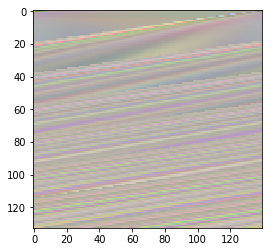

In [100]:
#Showing Flower Results
pyplot.imshow(X=np.array(Y2_pred).reshape(133,140,3)/np.amax(Y2_pred))
pyplot.show()